In [1]:
import numpy as np
from numpy import median, sqrt
from numpy.core.umath import absolute, floor, log
import pandas as pd
import datetime
import pywt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

wavelet = pywt.Wavelet(pywt.wavelist()[16])

In [2]:
# Wavelet
def denoise(data, wavelet):
    noiseSigma = median(absolute(data - median(data))) / 0.6745
    levels = int(floor(log(len(data))))
    WC = pywt.wavedec(data, wavelet, level=levels)
    threshold = noiseSigma * sqrt(2 * log(len(data)))
    NWC = map(lambda x: pywt.thresholding.hard(x, threshold), WC)
    return pywt.waverec(NWC, wavelet)

def Interpolate(evi):
    t = np.array([(i * 8) + 1 for i in range(len(evi))], dtype='float32')
    if evi[0] == -999:
        evi[0] = evi[evi != -999][0]
    if evi[-1] == -999:
        evi[-1] = evi[evi != -999][-1]
    t = t[evi != -999]
    f = interp1d(t, evi[evi != -999])
    ts = np.array([i + 1 for i in range(361)], dtype='float32')
    evinew = f(ts)
    return evinew

In [100]:
point_id = 46
df = pd.read_csv("../csv/all_year.csv")
us_df = df[df["CNTY"] == "US"]
us_df = us_df[us_df["ID"] == point_id]
us_df = us_df[us_df["LOC"] == "near"]

LIST = [datetime.datetime.strptime(i.split(" ")[0], "%Y-%m-%d") for i in us_df.DATE]
us_df.index = LIST

#2001年は6月18日だけデータがなかったので、NULLデータを追加
us_df = pd.DataFrame({
        "DATE": ["2002-06-18 00:00:00"],
        "EVI": [-999.],
        "NDVI": [-999.],
        "LSWI": [-999.], 
        "FLOOD": [0], 
        "ID": [point_id],
        "LOC": ["near"],
        "CNTY": ["US"],
        "TYP": [2],
        "LON": [-87.74464],
        "LAT": [38.099302 ]}, 
        index=[datetime.datetime.strptime("2001-6-18", "%Y-%m-%d")]).append(us_df).sort()

df_evi = pd.DataFrame({
        "evi_2001": us_df[us_df.index.year == 2001].EVI.values,
        "evi_2002": us_df[us_df.index.year == 2002].EVI.values,
        "evi_2003": us_df[us_df.index.year == 2003].EVI.values,
        "evi_2004": us_df[us_df.index.year == 2004].EVI.values,
        "evi_2005": us_df[us_df.index.year == 2005].EVI.values,
        "evi_2006": us_df[us_df.index.year == 2006].EVI.values,
        "evi_2007": us_df[us_df.index.year == 2007].EVI.values,
        "evi_2008": us_df[us_df.index.year == 2008].EVI.values,
        "evi_2009": us_df[us_df.index.year == 2009].EVI.values,
        "evi_2010": us_df[us_df.index.year == 2010].EVI.values},
        index=sorted(list(set([int(datetime.datetime.strftime(i, "%j")) for i in us_df.index]))))

In [101]:
evi = np.array([df_evi["evi_%d" % (y)].values for y in range(2001, 2011)])

newevi = np.array([Interpolate(array) for array in evi])

denoise_evi = np.array([denoise(array, wavelet) for array in newevi])

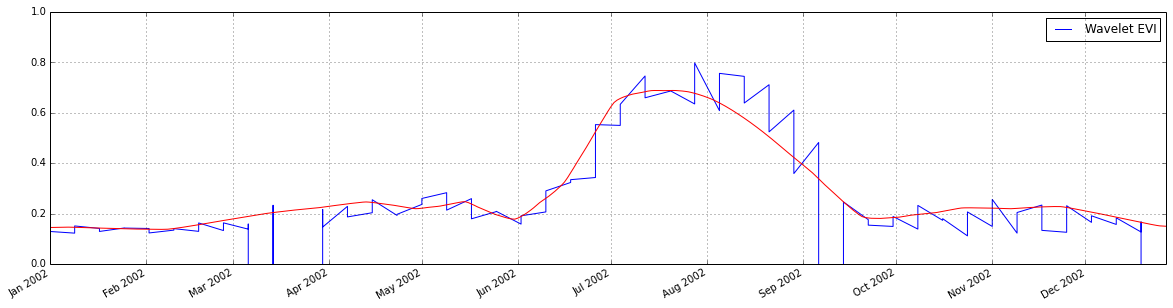

In [180]:


"""
filters = us_df[us_df.index.year == 2002]
filters = filters[filters["ID"] == 0]
filters.plot(y="EVI", figsize=(20, 5), color="blue", ylim=(0, 1))
dates = [datetime.datetime.strptime("%d-%d" % (2002, i + 1), "%Y-%j") for i in range(len(denoise_evi))]
plt.plot(dates, denoise_evi, color="red")
plt.legend(["Wavelet EVI"])
plt.show()"""

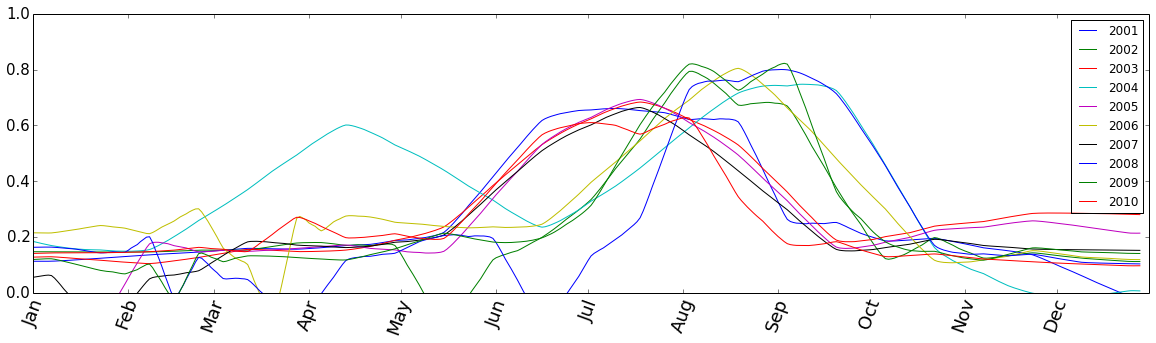

In [102]:
year = 2008
dates = [i + 1 for i in range(denoise_evi.shape[1])]
#df_evi.plot(y="evi_%d" % (year), figsize=(20, 5), color="blue", ylim=(0, 1))
plt.figure(figsize=(20, 5))
for year in range(2001, 2011):
    plt.plot(dates, denoise_evi[year - 2001])
    plt.xlim(1, 365)
    plt.ylim(0., 1.)
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
          ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=18, rotation=70)
plt.yticks(fontsize=15)
plt.legend(range(2001, 2011))
plt.show()

In [104]:
df.query('CNTY == "US" & ID == 46 & LOC == "near"')

,DATE,EVI,NDVI,LSWI,FLOOD,ID,LOC,CNTY,TYP,LON,LAT
119326,2000-02-18 00:00:00,0.149184,0.217369,-0.206777,0,46,near,US,3,-88.03486,38.09386
119327,2000-02-26 00:00:00,0.131354,0.221239,-0.267297,0,46,near,US,3,-88.03486,38.09386
119328,2000-03-05 00:00:00,0.141623,0.213796,-0.267361,0,46,near,US,3,-88.03486,38.09386
119329,2000-03-13 00:00:00,0.195716,0.191370,-0.197732,0,46,near,US,3,-88.03486,38.09386
119330,2000-03-21 00:00:00,0.135482,0.226652,-0.259259,0,46,near,US,3,-88.03486,38.09386
119331,2000-03-29 00:00:00,0.146349,0.232642,-0.263923,0,46,near,US,3,-88.03486,38.09386
119332,2000-04-06 00:00:00,0.200116,0.306344,-0.223136,0,46,near,US,3,-88.03486,38.09386
119333,2000-04-14 00:00:00,0.168997,0.269492,-0.237586,0,46,near,US,3,-88.03486,38.09386
119334,2000-04-22 00:00:00,0.156070,0.249803,-0.254865,0,46,near,US,3,-88.03486,38.09386
119335,2000-04-30 00:00:00,0.169006,0.240691,-0.256475,0,46,near,US,3,-88.03486,38.09386


In [72]:
df.query('FLOOD == 1 & CNTY == "US" & TYP == 2')

,DATE,EVI,NDVI,LSWI,FLOOD,ID,LOC,CNTY,TYP,LON,LAT
96458,2001-01-09 00:00:00,0.169204,0.201469,0.392263,1,0,near,US,2,-87.744640,38.099302
96499,2001-12-11 00:00:00,0.005826,0.012839,0.143778,1,0,near,US,2,-87.744640,38.099302
96551,2003-01-25 00:00:00,0.148724,0.177207,0.165578,1,0,near,US,2,-87.744640,38.099302
96598,2004-02-02 00:00:00,0.153325,0.166144,0.167975,1,0,near,US,2,-87.744640,38.099302
96779,2008-01-09 00:00:00,0.171772,0.217969,0.144640,1,0,near,US,2,-87.744640,38.099302
96783,2008-02-10 00:00:00,0.137670,0.262548,0.100393,1,0,near,US,2,-87.744640,38.099302
96787,2008-03-13 00:00:00,0.015535,0.030660,0.252069,1,0,near,US,2,-87.744640,38.099302
96913,2010-12-11 00:00:00,0.097299,0.097626,0.587486,1,0,near,US,2,-87.744640,38.099302
96956,2001-01-09 00:00:00,0.213815,0.256784,0.375339,1,1,near,US,2,-87.731305,38.155715
97326,2009-02-02 00:00:00,0.042591,0.047921,0.378465,1,1,near,US,2,-87.731305,38.155715
